In [1]:
pip install yfinance

     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
      --------------------------------------- 0.1/3.0 MB 218.8 kB/s eta 0:00:14
      --------------------------------------- 0.1/3.0 MB 245.8 kB/s eta 0:00:12
      --------------------------------------- 0.1/3.0 MB 245.8 kB/s eta 0:00:12
      --------------------------------------- 0.1/3.0 MB 245.8 kB/s eta 0:00:12
      --------------------------------------- 0.1/3.0 MB 245.8 kB/s eta 0:00:12
      --------------------------------------- 0.1/3.0 MB 245.8 kB/s eta 0:00:12
      --------------------------------------- 0.1/3.0 MB 245.8 kB/s eta 0:00:12
      --------

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import yfinance as yf

In [2]:
gold_data = yf.download('GC=F', start='2014-02-01', end ='2024-07-01')

print(gold_data.tail())

[*********************100%%**********************]  1 of 1 completed

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2024-06-24  2323.300049  2332.899902  2322.699951  2330.000000  2330.000000   
2024-06-25  2324.399902  2333.000000  2316.600098  2316.600098  2316.600098   
2024-06-26  2307.899902  2314.399902  2298.000000  2299.199951  2299.199951   
2024-06-27  2296.800049  2329.000000  2295.000000  2324.500000  2324.500000   
2024-06-28  2325.399902  2338.300049  2319.000000  2327.699951  2327.699951   

            Volume  
Date                
2024-06-24      99  
2024-06-25     105  
2024-06-26     986  
2024-06-27    1532  
2024-06-28      92  


In [3]:
gold_data = gold_data[['Close']]
gold_data = gold_data.dropna()

gold_data.reset_index(inplace=True)

gold_data['Date'] = gold_data['Date'].map(pd.Timestamp.toordinal)

print(gold_data.head())

     Date        Close
0  735267  1260.400024
1  735268  1251.699951
2  735269  1257.300049
3  735270  1257.599976
4  735271  1263.300049


In [4]:
X = gold_data[['Date']]
Y = gold_data['Close']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size =0.3, random_state=42)

In [5]:
model = LinearRegression()

model.fit(X_train, Y_train)

LinearRegression()

In [6]:
Y_pred = model.predict(X_test)

In [7]:
mse = mean_squared_error(Y_test,Y_pred)
r2 =r2_score(Y_test, Y_pred)

print("Mean Squared Error(MSE) calculated by 24MAI0111 ANMOL CHAUBEY:", mse)
print("R^2 Score", r2)

Mean Squared Error(MSE) calculated by 24MAI0111 ANMOL CHAUBEY: 19223.27005485159
R^2 Score 0.8204867759217334


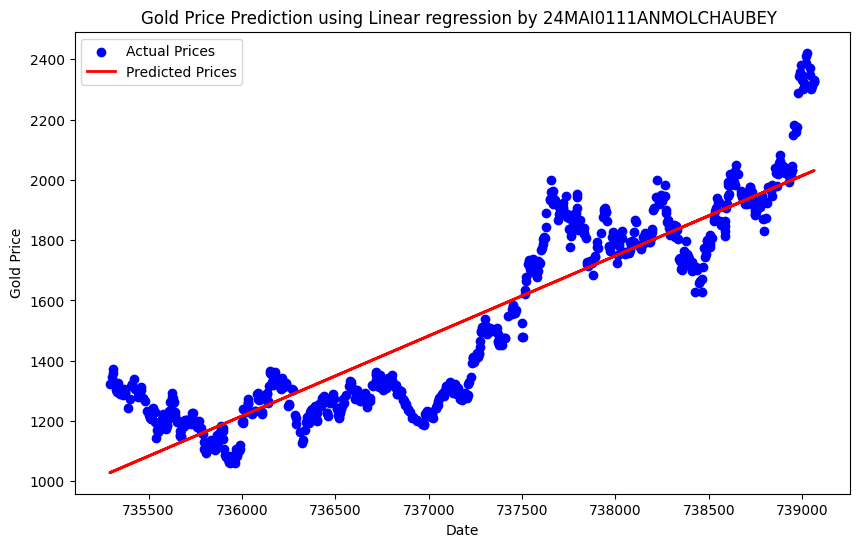

In [8]:
plt.figure(figsize = (10,6))
plt.scatter(X_test, Y_test, color = 'blue', label='Actual Prices')
plt.plot(X_test,Y_pred,color='red', linewidth=2, label='Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.title('Gold Price Prediction using Linear regression by 24MAI0111ANMOLCHAUBEY ')
plt.legend()
plt.show()